# Data Science and Business Intelligence Internship
Task-1 Prediction using Supervised ML

Predict the percentage of an student based on the no. of study hours using Python/R/SAS

# Importing packages

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

# Reading the dataset

In [2]:
link = "http://bit.ly/w-data"
dataset = pd.read_csv(link)
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
dataset.shape

(25, 2)

In [4]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualizing the dataset

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

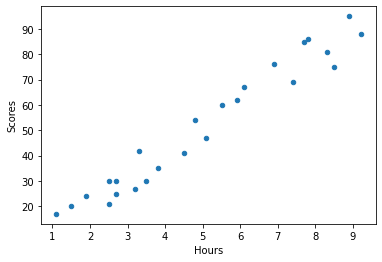

In [5]:
dataset.plot(kind='scatter',x='Hours', y='Scores')

In [6]:
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Split the data into Dependent and Independent variable.

In [7]:
X = dataset.iloc[:,:-1].values  
Y = dataset.iloc[:, 1].values

# Splitting dataset into training and testing set

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0)

# Training the algorithm

In [9]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

LinearRegression()

# Plotting the regression line

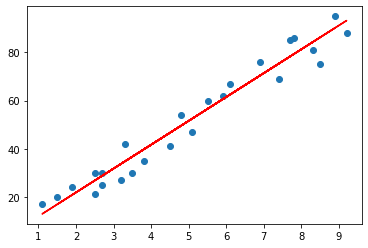

In [10]:
line = regressor.coef_*X + regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line,color='red');
plt.show()

# Predicting the scores for the given values in the test set

In [11]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Comparing Actual vs Predicted


In [12]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<AxesSubplot:>

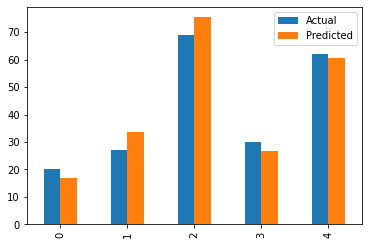

In [13]:
df.plot(kind = 'bar')

# What will be predicted score if a student studies for 9.25 hrs/ day?

In [14]:
no_hours = 9.25
pred_score = regressor.predict([[no_hours]])
print("No of Hours = {}".format(no_hours))
print("Predicted Score = {}".format(pred_score[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


# Evaluating the model

In [15]:
from sklearn import metrics  
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred)) 
print ('Mean Squared Error:' ,metrics.mean_squared_error(Y_test, y_pred))
print ('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('R2 score                :', r2_score(Y_test,y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R2 score                : 0.9454906892105356
